In [1]:
#Course : CS 513 - Knowledge discovery and Data mining
#Course Instructor:- Khashayar Dehnad
#First Name: Keval
#Last Name: Sompura
#Id: 20033127
#Final Exam: 03 - Clustering
#Description: Implementation of Clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns


In [3]:
folder='C:/Users/Asus/OneDrive/Stevens/Sem-2/KDDM/End Term/'
file='hepatitis_B2.csv'
data = pd.read_csv(folder+file)
data.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY,Age_Quartile
0,1,39,1,1,1,1,1,2,2,1,2,2,2,2,2.3,280,98,3.8,1,Q2
1,1,37,1,2,2,1,2,2,2,2,2,1,2,2,0.6,67,28,4.2,1,Q2
2,1,58,1,2,2,1,2,2,1,1,1,1,2,2,2.0,167,242,3.3,1,Q4
3,1,30,1,2,2,1,1,1,2,1,2,1,1,1,2.5,165,64,2.8,2,Q1
4,1,38,1,1,2,1,1,1,2,1,2,1,1,1,1.2,118,16,2.8,2,Q2


In [4]:
data.describe()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
count,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000
mean,1.525000,42.35000,1.100000,1.525000,1.775000,1.250000,1.600000,1.85000,1.825000,1.475000,1.825000,1.550000,1.750000,1.800000,1.490000,101.97500,71.825000,3.645000,1.425000
std,0.505736,11.86797,0.303822,0.505736,0.422902,0.438529,0.496139,0.36162,0.384808,0.505736,0.384808,0.503831,0.438529,0.405096,1.091647,51.05125,59.340775,0.651212,0.500641
min,1.000000,22.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.400000,45.00000,16.000000,2.100000,1.000000
25%,1.000000,33.75000,1.000000,1.000000,2.000000,1.000000,1.000000,2.00000,2.000000,1.000000,2.000000,1.000000,1.750000,2.000000,0.775000,66.50000,28.000000,3.250000,1.000000
50%,2.000000,40.50000,1.000000,2.000000,2.000000,1.000000,2.000000,2.00000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.100000,85.00000,54.000000,3.800000,1.000000
75%,2.000000,49.00000,1.000000,2.000000,2.000000,1.250000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,119.25000,91.250000,4.100000,2.000000
max,2.000000,78.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.800000,280.00000,249.000000,4.900000,2.000000


In [5]:
# Check for null values and remove them
print("Null values in each column:")
print(data.isnull().sum())

data = data.dropna()

Null values in each column:
Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER_BIG          0
LIVER_FIRM         0
SPLEEN_PALPABLE    0
SPIDERS            0
ASCITES            0
 VARICES           0
BILIRUBIN          0
ALK_PHOSPHATE      0
SGOT               0
ALBUMIN            0
HISTOLOGY          0
Age_Quartile       0
dtype: int64


In [6]:
print("\nNull values after removal:")
print(data.isnull().sum())


Null values after removal:
Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER_BIG          0
LIVER_FIRM         0
SPLEEN_PALPABLE    0
SPIDERS            0
ASCITES            0
 VARICES           0
BILIRUBIN          0
ALK_PHOSPHATE      0
SGOT               0
ALBUMIN            0
HISTOLOGY          0
Age_Quartile       0
dtype: int64


In [7]:
# Select relevant attributes for clustering
attributes = ['AGE', 'SEX', 'ASCITES', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN']
data_clustering = data[attributes]

In [15]:
# Normalize the data
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(data_clustering), columns=attributes)
Y = data['Class']
X.head()

,AGE,SEX,ASCITES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN
0,0.303571,0.0,1.0,0.431818,1.000000,0.351931,0.607143
1,0.267857,0.0,1.0,0.045455,0.093617,0.051502,0.750000
2,0.642857,0.0,1.0,0.363636,0.519149,0.969957,0.428571
3,0.142857,0.0,0.0,0.477273,0.510638,0.206009,0.250000
4,0.285714,0.0,0.0,0.181818,0.310638,0.000000,0.250000


In [9]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
hClusters = hierarchical.fit_predict(X)

In [10]:
# Cross tabulation
df_cluster=pd.DataFrame({'Actual':Y,'Cluster':hClusters})
cross_tab = pd.crosstab(df_cluster['Actual'], df_cluster['Cluster'])
print("Hierarchical Clustering - Cross Tabulation:")
print(cross_tab)

Hierarchical Clustering - Cross Tabulation:
Cluster   0  1
Actual        
1        10  9
2        20  1


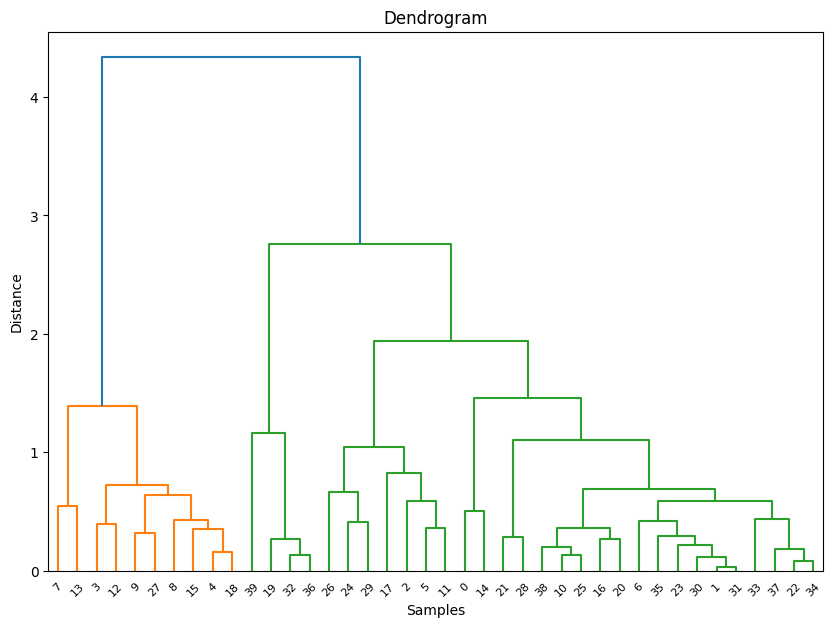

In [16]:
# Plotting the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


In [11]:
print(df_cluster)

    Actual  Cluster
0        1        0
1        1        0
2        1        0
3        1        1
4        1        1
5        1        0
6        1        0
7        1        1
8        1        1
9        1        1
10       1        0
11       1        0
12       1        1
13       1        1
14       1        0
15       1        1
16       1        0
17       1        0
18       1        1
19       2        0
20       2        0
21       2        0
22       2        0
23       2        0
24       2        0
25       2        0
26       2        0
27       2        1
28       2        0
29       2        0
30       2        0
31       2        0
32       2        0
33       2        0
34       2        0
35       2        0
36       2        0
37       2        0
38       2        0
39       2        0


In [12]:
# K-means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kCluster = kmeans.fit_predict(X)

# print labels and cluster centers
print("\nKMeans Cluster Labels:")
print(kmeans.labels_)
print("\nKMeans Cluster Centers:")
print(kmeans.cluster_centers_)


KMeans Cluster Labels:
[0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0]

KMeans Cluster Centers:
[[3.58928571e-01 1.33333333e-01 1.00000000e+00 1.90151515e-01
  2.26808511e-01 2.55793991e-01 6.55952381e-01]
 [3.76785714e-01 1.38777878e-17 0.00000000e+00 4.20454545e-01
  2.89361702e-01 1.90987124e-01 2.39285714e-01]]


In [13]:
#Cross tabulation for K-means
df_kmeans = pd.DataFrame({'Actual': Y, 'Cluster': kCluster})
cross_tab_kmeans = pd.crosstab(df_kmeans['Actual'], df_kmeans['Cluster'])
print("\nCross Tabulation of Class and K-means Cluster:")
print(cross_tab_kmeans)



Cross Tabulation of Class and K-means Cluster:
Cluster   0  1
Actual        
1        10  9
2        20  1


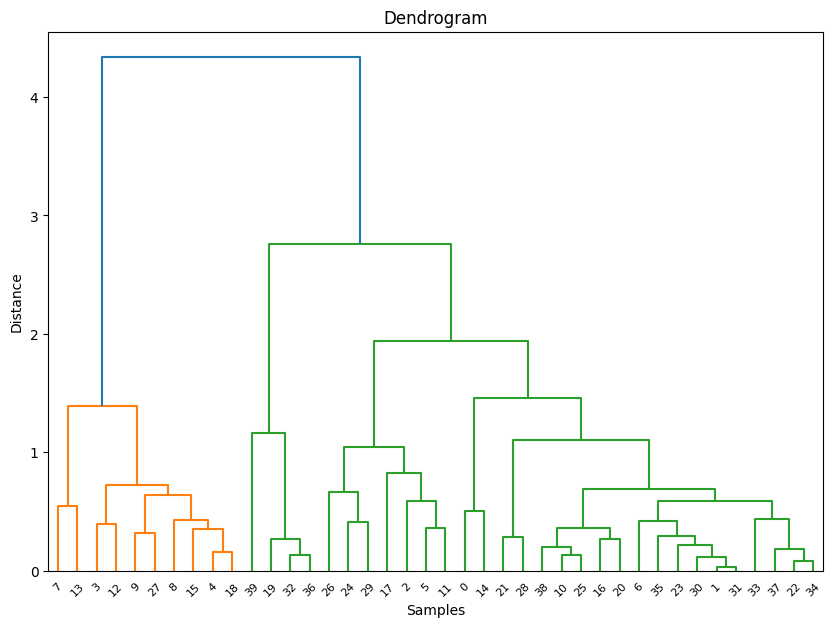

In [17]:
# Plotting the dendrogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

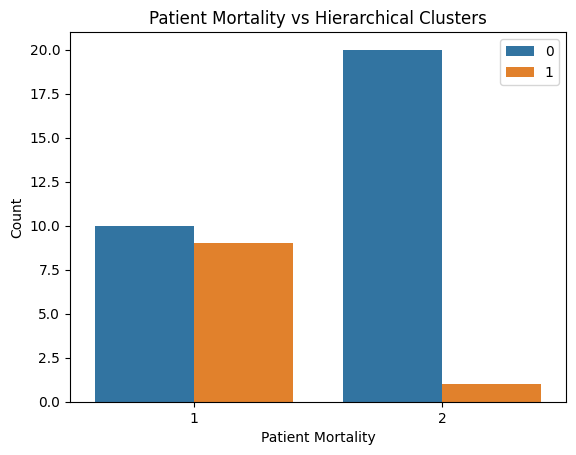

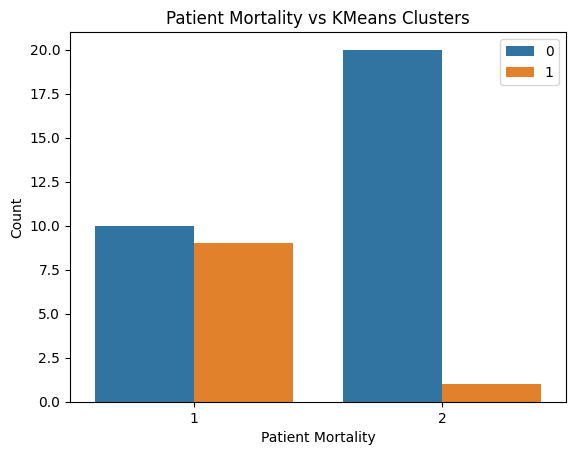

In [14]:
# Show "Patient mortality" versus clusters
sns.countplot(x='Class', hue=hClusters, data=data)
plt.title('Patient Mortality vs Hierarchical Clusters')
plt.xlabel('Patient Mortality')
plt.ylabel('Count')
plt.show()

sns.countplot(x='Class', hue=kCluster, data=data)
plt.title('Patient Mortality vs KMeans Clusters')
plt.xlabel('Patient Mortality')
plt.ylabel('Count')
plt.show()